Sales Summary:

  product  total_qty  revenue
0   Apple         17      8.5
1  Banana         17      5.1
2  Orange         14      9.8


<Figure size 800x500 with 0 Axes>

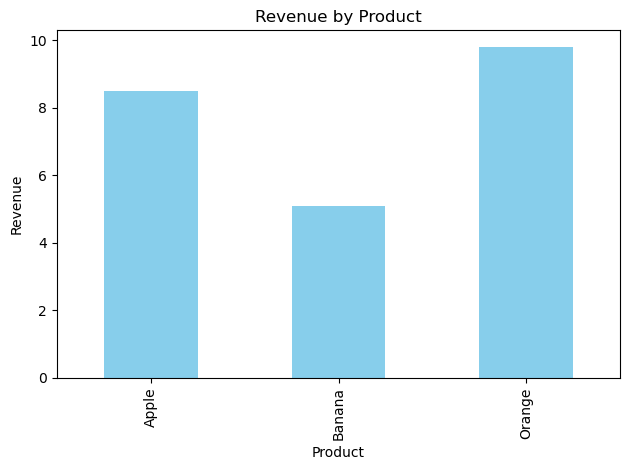

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database (creates it if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Create a simple sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
''')

# Step 3: Insert some sample data
sample_data = [
    ('Apple', 10, 0.5),
    ('Banana', 5, 0.3),
    ('Apple', 7, 0.5),
    ('Orange', 8, 0.7),
    ('Banana', 12, 0.3),
    ('Orange', 6, 0.7)
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()

# Step 4: Query total quantity and revenue per product
query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''

df = pd.read_sql_query(query, conn)
print("Sales Summary:\n")
print(df)

# Step 5: Plot bar chart
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save the chart
plt.show()

# Step 6: Close connection
conn.close()
